In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pylab
from scipy import interpolate
from scipy.interpolate import CubicSpline
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker

%matplotlib inline

In [2]:
MxH= pd.read_csv("M16M2-MH3.csv")

In [11]:
newMxH[['Magnetic Field (Oe)','M (emu/g)']]

,Magnetic Field (Oe),M (emu/g)
0,-0.341259,0.002013
1,99.519516,0.007021
2,184.458275,0.063783
3,307.398956,0.245135
4,840.786346,1.835038
...,...,...
3320,89423.632812,30.805650
3321,89494.101562,30.809346
3322,89609.664062,30.812852
3323,89720.144531,30.816405


In [3]:
MxH

,Magnetic Field (Oe),Temperature (K),Moment (emu),M (emu/g)
0,-0.341259,3.007444,0.000058,0.002013
1,99.519516,3.005208,0.000201,0.007021
2,184.458275,3.004557,0.001824,0.063783
3,307.398956,3.013775,0.007011,0.245135
4,840.786346,3.003823,0.052482,1.835038
...,...,...,...,...
3320,89423.632812,3.006917,0.881042,30.805650
3321,89494.101562,3.007135,0.881147,30.809346
3322,89609.664062,3.007578,0.881248,30.812852
3323,89720.144531,3.007524,0.881349,30.816405


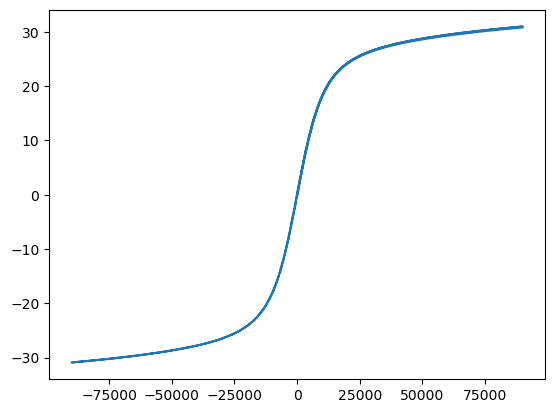

In [8]:
plt.plot(MxH['Magnetic Field (Oe)'],MxH['M (emu/g)'])
plt.show()

In [2]:
data = pd.read_csv("ChiT_M16_zfc.csv")
data

,Temperature(K),ChiT(emuK/gOe)
0,2.00060,0.00671
1,2.02466,0.00675
2,2.07662,0.00674
3,2.15988,0.00678
4,2.23937,0.00685
...,...,...
4013,269.31897,0.00759
4014,269.33113,0.00756
4015,269.34288,0.00762
4016,269.35571,0.00756


Text(0, 0.5, 'M (emu/g)')

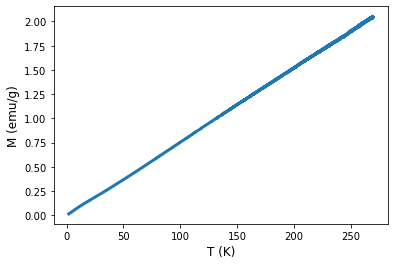

In [3]:
fig, ax = plt.subplots()
ax.plot(data['Temperature(K)'], data['ChiT(emuK/gOe)']*data['Temperature(K)'],'-',lw=3)
#ax.legend(loc='upper right', fontsize=14)
ax.set_xlabel('T (K)',fontsize = 12)
ax.set_ylabel("M (emu/g)", fontsize = 12)

In [4]:
data['Chi'] = data['M (emu/g)'] / data['Magnetic Field (Oe)']
data['ChiT'] =  data['Chi']*data['Temperature (K)']

KeyError: 'M (emu/g)'

In [5]:
def filtro(T, ChiT, T_min, T_max,wl,pl):
    data_filtered = data[(data["Temperature(K)"] >= T_min) & (data["Temperature(K)"] <= T_max)]
    T = np.array(data_filtered["Temperature(K)"])
    ChiT = np.array(data_filtered["ChiT(emuK/gOe)"])
    interp_func = interpolate.interp1d(T, ChiT, kind='linear')
    T_interp = np.linspace(T.min(), T.max(), num=60)  
    ChiT_interp = interp_func(T_interp)
    ChiTS = savgol_filter(ChiT_interp, wl, pl)
    return T_interp, ChiTS

In [6]:
T = np.array(data["Temperature(K)"])
ChiT = np.array(data["ChiT(emuK/gOe)"])
Tf1, ChiTf1 = filtro(T, ChiT, 50, 230, 27,4)
Tf2, ChiTf2 = filtro(T, ChiT, 10, 51,27,4)
Tf3, ChiTf3 = filtro(T, ChiT, 1, 10,27,4)

#Gambiarra pra concatenar os DFs (da pra fazer com as os arrays msm)
df1 = pd.DataFrame({"T": Tf3, "ChiT": ChiTf3})
df2 = pd.DataFrame({"T": Tf2, "ChiT": ChiTf2})
df3 = pd.DataFrame({"T": Tf1, "ChiT": ChiTf1})
df = pd.concat([df1,df2,df3])

#dados filtrados
#A = 780.31/(6.022*10**23*9.27*10**(-21))
x= df["T"]
y = df["ChiT"]*780.31


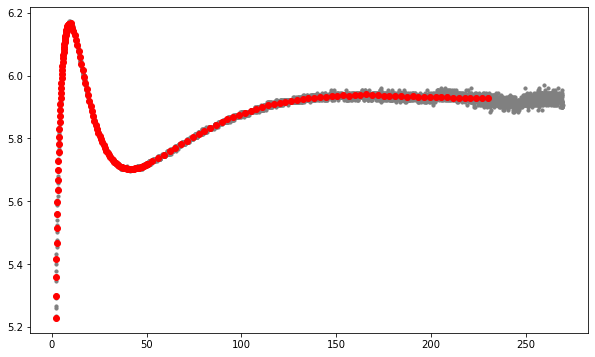

In [7]:
fig= plt.subplots(figsize = (10,6))
plt.scatter(data['Temperature(K)'],data['ChiT(emuK/gOe)']*780.31 ,marker = 'o',s = 10,color = "gray")
plt.plot(x,y,'o',color="red")

In [8]:
chi =pd.DataFrame({"T":x,"ChiT":y})
chi.to_csv("ChiT.csv",index=False)
chi.describe()

,T,ChiT
count,180.000000,180.000000
mean,58.828962,5.887798
std,66.318568,0.180543
min,2.000600,5.228374
25%,8.052711,5.745704
50%,30.509580,5.918247
75%,93.469363,5.998967
max,229.972070,6.165805


In [9]:
chi.to_csv('arquivo.dat', sep='\t', index=False, header=False)

In [14]:
df2= pd.read_csv("chiartg.csv")
df2

,t,chi
0,2.067583,0.009371
1,2.720504,0.016439
2,3.155785,0.022597
3,3.591065,0.027791
4,4.026346,0.031754
5,4.461627,0.034378
6,4.896907,0.036037
7,5.332188,0.037001
8,6.420389,0.037483
9,7.290951,0.036680


In [18]:
Chi = df2["t"]*df2["chi"]
t=df2["t"]

In [20]:
df3 = pd.DataFrame({"T":t,"ChiT":Chi})

In [21]:
df3.to_csv('arquivo2.dat', sep='\t', index=False, header=False)